In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# OBJECTIVE 3: To study and analyse different factors responsible for enrolment and the completion rate in higher education, globally.

# P1 - To predict the number of scholarships available to the Indian students by India in the years 2021-2030, for enrolment in higher education based on the analysis of data given for the years 2010-2020.

# DATASET FOR PROBLEM STATEMENT - 1

In [16]:
data_PS1 = pd.read_csv('Scholarship_India1.csv')
data_PS1

,Year,India
0,2010,12001394
1,2011,13234234
2,2012,13934587
3,2013,15014589
4,2014,14784598
5,2015,16457864
6,2016,17012549
7,2017,17894568
8,2018,18012459
9,2019,18947865


# SCATTER PLOT for 2010-2020 for India

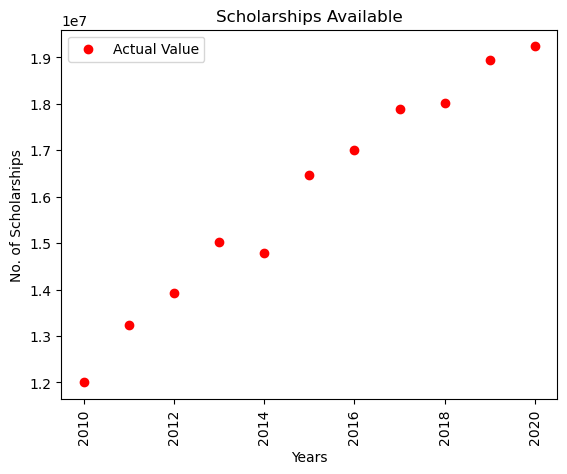

In [3]:
plt.scatter(data_PS1['Year'], data_PS1['India'],label='Actual Value',color="red")
plt.xlabel('Years')
plt.ylabel('No. of Scholarships')
plt.title('Scholarships Available')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# REGRESSION ANALYSIS (Multiple Linear Regression)

Predicted values:  [[12446210.909091  ]
 [13166591.85454559]
 [13886972.80000019]
 [14607353.74545479]
 [15327734.69090915]
 [16048115.63636374]
 [16768496.58181834]
 [17488877.52727294]
 [18209258.47272754]
 [18929639.4181819 ]
 [19650020.36363649]]
Actual values:         India
0   12001394
1   13234234
2   13934587
3   15014589
4   14784598
5   16457864
6   17012549
7   17894568
8   18012459
9   18947865
10  19234565
Sum of Square Error(SSE):  India    1.269248e+12
dtype: float64
Residuals             India
0   444816.909091
1    67642.145454
2    47614.200000
3   407235.254545
4   543136.690909
5   409748.363636
6   244052.418182
7   405690.472727
8   196799.472728
9    18225.581818
10  415455.363636


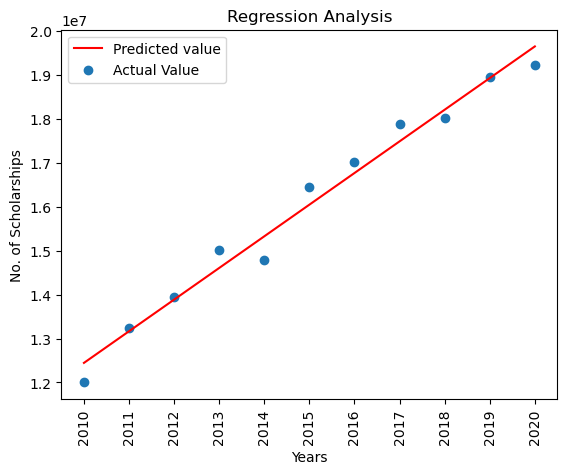

   Year      Predicted Values
0  2021   [20370401.30909109]
1  2022   [21090782.25454569]
2  2023  [21811163.200000048]
3  2024  [22531544.145454645]
4  2025  [23251925.090909243]
5  2026   [23972306.03636384]
6  2027  [24692686.981818438]
7  2028  [25413067.927272797]
8  2029  [26133448.872727394]
9  2030   [26853829.81818199]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
x = pd.DataFrame(data_PS1['Year'])
y = pd.DataFrame(data_PS1['India'])
model=LinearRegression()
model.fit(x,y)
yPred=model.predict(x)
print('Predicted values: ',yPred)
print('Actual values: ',y)
print('Sum of Square Error(SSE): ',((np.subtract(yPred,y))**2).sum())
residuals = y - yPred
print('Residuals',abs(residuals))
x = ['2010','2011','2012','2013',
     '2014','2015','2016','2017','2018','2019','2020']
plt.plot(x,yPred,label='Predicted value',color='red')
plt.scatter(x,y,label='Actual Value')
plt.xlabel('Years')
plt.ylabel('No. of Scholarships')
plt.title('Regression Analysis')
plt.xticks(rotation=90)
plt.legend()
plt.show()
l = ['2021','2022','2023','2024','2025','2026','2027',
     '2028','2029','2030']
x = pd.DataFrame(l)
y = model.predict(x)
columns = ['Year','Predicted Values']
data = {columns[0]:l,columns[1]:list(y)}
p = pd.DataFrame(data)
print(p)

In [93]:
values1 = [[12446210.909091],[13166591.85454559],[13886972.80000019],[14607353.74545479],[15327734.69090915],[16048115.63636374],[16768496.58181834],[17488877.52727294],[18209258.47272754],[18929639.4181819 ],[19650020.36363649]]
values2 = [444816.909091,67642.145454,47614.200000,407235.254545,543136.690909,409748.363636,244052.418182,405690.472727,196799.472728,18225.581818,415455.363636]
columns = ['Predicted Values','Residuals']
data = {columns[0]:values1,columns[1]:values2}
df = pd.DataFrame(data)
df

,Predicted Values,Residuals
0,[12446210.909091],444816.909091
1,[13166591.85454559],67642.145454
2,[13886972.80000019],47614.200000
3,[14607353.74545479],407235.254545
4,[15327734.69090915],543136.690909
5,[16048115.63636374],409748.363636
6,[16768496.58181834],244052.418182
7,[17488877.52727294],405690.472727
8,[18209258.47272754],196799.472728
9,[18929639.4181819],18225.581818


# Problem Statement 2

# P2 - To check if there is statistically significant difference in the percentage of total aid to education allocated to least developed countries among different regions of the world for the years 2019 and 2020. 

# DATASETS FOR PROBLEM STATEMENT - 2

In [60]:
data_PS2= pd.read_csv('education_aid.csv')
data_PS2

,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Kazakhstan,0.00,0.00,57.14,82.31,100.00,7.22,85.49,27.43,77.50
1,Japan,36.28,33.76,40.12,28.73,33.78,27.93,27.72,28.74,22.86
2,Republic of Korea,30.58,31.05,30.87,30.49,38.52,34.92,35.69,35.70,36.84
3,Austria,4.38,6.39,3.72,3.70,5.20,5.58,5.65,5.86,4.17
4,Belgium,33.45,40.98,44.29,47.10,47.02,43.63,45.65,51.66,48.30
5,Canada,48.56,64.73,53.46,56.11,47.90,45.29,58.37,36.47,40.91
6,Czechia,40.70,24.84,46.35,45.72,34.51,37.01,28.75,27.32,28.68
7,Denmark,36.83,26.01,29.06,29.00,8.03,30.61,24.43,11.62,5.86
8,Estonia,0.00,36.35,18.90,25.23,25.52,16.18,6.71,8.04,8.46
9,Finland,59.79,54.17,60.37,62.51,68.31,68.62,66.56,61.48,67.38


# Dataframe Shown with limited no. of rows 

In [61]:
first_five = data_PS2.head(6)
last_five = data_PS2.tail()
result = pd.concat([first_five, last_five])
result.index = result.index + 1 # shifting index
result.loc[len(first_five)] = ['-']*len(data_PS2.columns) # insert dashes
print(result)

              Country   2012   2013   2014   2015   2016   2017   2018   2019  \
1          Kazakhstan    0.0    0.0  57.14  82.31  100.0   7.22  85.49  27.43   
2               Japan  36.28  33.76  40.12  28.73  33.78  27.93  27.72  28.74   
3   Republic of Korea  30.58  31.05  30.87  30.49  38.52  34.92  35.69   35.7   
4             Austria   4.38   6.39   3.72    3.7    5.2   5.58   5.65   5.86   
5             Belgium  33.45  40.98  44.29   47.1  47.02  43.63  45.65  51.66   
6                   -      -      -      -      -      -      -      -      -   
16            Ireland  58.87  60.71  69.92  65.04  52.53   55.4  44.15  39.64   
17              Italy  35.76  40.38  43.71  33.94  34.67  44.35  38.86  35.63   
18         Luxembourg  44.21  54.43   65.5  72.77  70.44  57.46  66.96  70.48   
19        Netherlands  34.56  18.94   4.22   3.01   5.25   7.43  13.38   7.94   
20             Norway  38.56   28.6  29.76  31.05  28.21  30.54  35.41  37.15   

     2020  
1    77.5  
2  

# HYPOTHESIS TESTING USING T-TEST

Formation of Hypothesis:-

Formulate the null hypothesis
H0 = "There is no change in the proportion of total aid for education allocated to least developed countries for the year 2019 and 2020"

Formulate the alternative hypothesis
H1 = "There is a change in the proportion of total aid for education for the year 2019 and 2020"

In [69]:
# Problem Statement 2 (Hypothesis Testing-I Using T-Test)
from scipy.stats import norm

x1 = round(data_PS2['2019'].mean(),3)
print('Mean for the year 2019 : ',x1)
x2 = round(data_PS2['2020'].mean(),3)
print('Mean for the year 2020 : ',x2)

s1 = round(data_PS2['2019'].std(),3)
print('Standard Deviation for the year 2019 : ',s1)
s2 = round(data_PS2['2020'].std(),3)
print('Standard Deviation for the year 2020 : ',s2)

sp = (((s1**2) + (s2**2))/2)**0.5
sp = round(sp,3)
print('Sp : ',sp)

n1 = 20     # Sample Size of least developed countries in 2019
n2 = 20     # Sample Size of least developed countries in 2020

t1 = (x1-x2)/sp
t2 = ((1/n1) + (1/n2))**0.5

# Calculation of T-statistic value

t = round(t1/t2,3)
print('Value of t : ',t)    

# Set the level of significance

alpha = 0.05     # Significance level
df = 20+20-2     # Degree of Freedom

ta = 2.024
print('ta :',ta)

if t > ta:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Mean for the year 2019 :  31.139
Mean for the year 2020 :  33.219
Standard Deviation for the year 2019 :  24.454
Standard Deviation for the year 2020 :  26.266
Sp :  25.376
Value of t :  -0.259
ta : 2.024
Accept the null hypothesis


# BAR PLOT TO COMPARE MEAN VALUES

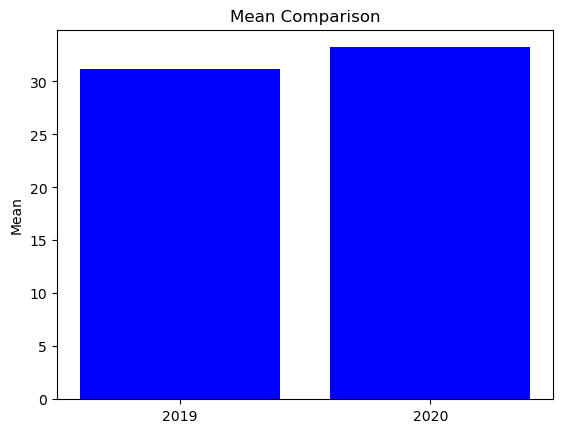

In [67]:
# Calculate the mean of Column1 and Column2
mean1 = data_PS2['2019'].mean()
mean2 = data_PS2['2020'].mean()

# Create a bar plot
plt.bar(['2019', '2020'], [mean1, mean2],color='blue')
plt.ylabel('Mean')
plt.title('Mean Comparison')

# Show the plot
plt.show()

After performing above analysis of the data to check if there is statistically significant difference in the percentage of total aid to education allocated to least developed countries among different regions of the world of two consecutive years 2019 and 2020, we can conclude that after observing the data we can say that there is significant difference in both the years 2019 and 2020 but from hypothesis testing, it is seen that there is no significant difference in both the years and thus we are accepting null hypothesis. So we come to the conclusion that there is TYPE-2 error in the data i.e Accepting the null hypothesis even though it should be rejected.

# Year-wise Mean Calculation of countries

In [70]:
# Calculate the mean of multiple columns
mean_cols = data_PS2[['2012','2013','2014','2015','2016','2017','2018','2019','2020']].mean()

#add mean values to new row
data_PS2.loc['20'] = round(mean_cols,2)
data_PS2.loc['20','Country'] = 'Mean'

# check the Dataframe with mean values
print(data_PS2)

              Country   2012   2013   2014   2015    2016   2017   2018  \
0          Kazakhstan   0.00   0.00  57.14  82.31  100.00   7.22  85.49   
1               Japan  36.28  33.76  40.12  28.73   33.78  27.93  27.72   
2   Republic of Korea  30.58  31.05  30.87  30.49   38.52  34.92  35.69   
3             Austria   4.38   6.39   3.72   3.70    5.20   5.58   5.65   
4             Belgium  33.45  40.98  44.29  47.10   47.02  43.63  45.65   
5              Canada  48.56  64.73  53.46  56.11   47.90  45.29  58.37   
6             Czechia  40.70  24.84  46.35  45.72   34.51  37.01  28.75   
7             Denmark  36.83  26.01  29.06  29.00    8.03  30.61  24.43   
8             Estonia   0.00  36.35  18.90  25.23   25.52  16.18   6.71   
9             Finland  59.79  54.17  60.37  62.51   68.31  68.62  66.56   
10             France  21.56  19.87  20.94  20.60   19.81  22.48  21.73   
11            Germany  17.59  14.31  14.33  12.54   12.00  11.02  10.21   
12             Greece   3

# Same Dataset but in Transposed form

In [74]:
df_PS2 = pd.read_csv('edu_aid.csv')
df_PS2

,Year,France,Japan,Republic of Korea,Austria,Belgium,Canada,Czechia,Denmark,Estonia,...,Germany,Greece,Hungary,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Mean
0,2012,21.56,36.28,30.58,4.38,33.45,48.56,40.70,36.83,0.00,...,17.59,3.89,0.00,82.94,58.87,35.76,44.21,34.56,38.56,31.43
1,2013,19.87,33.76,31.05,6.39,40.98,64.73,24.84,26.01,36.35,...,14.31,8.62,0.00,92.02,60.71,40.38,54.43,18.94,28.60,32.81
2,2014,20.94,40.12,30.87,3.72,44.29,53.46,46.35,29.06,18.90,...,14.33,8.80,4.51,97.42,69.92,43.71,65.50,4.22,29.76,37.17
3,2015,20.60,28.73,30.49,3.70,47.10,56.11,45.72,29.00,25.23,...,12.54,8.63,3.68,96.31,65.04,33.94,72.77,3.01,31.05,37.92
4,2016,19.81,33.78,38.52,5.20,47.02,47.90,34.51,8.03,25.52,...,12.00,4.33,4.22,93.07,52.53,34.67,70.44,5.25,28.21,36.67
5,2017,22.48,27.93,34.92,5.58,43.63,45.29,37.01,30.61,16.18,...,11.02,9.32,3.80,87.91,55.40,44.35,57.46,7.43,30.54,32.33
6,2018,21.73,27.72,35.69,5.65,45.65,58.37,28.75,24.43,6.71,...,10.21,4.82,2.57,8.26,44.15,38.86,66.96,13.38,35.41,31.57
7,2019,22.91,28.74,35.70,5.86,51.66,36.47,27.32,9.62,8.04,...,9.57,3.14,4.90,96.09,39.64,35.63,70.48,7.94,37.15,30.99
8,2020,23.35,22.86,36.84,4.17,48.30,40.91,28.68,5.86,8.46,...,11.20,5.67,6.77,94.75,44.33,26.40,71.58,10.54,38.83,34.22


# Dataframe shown with limited columns

In [72]:
first_five = df_PS2.loc[:, df_PS2.columns[:6]]
last_five = df_PS2.loc[:, df_PS2.columns[-4:]]
result = pd.concat([first_five, last_five], axis=1)
result.insert(len(first_five.columns), 'dashes', '-')
print(result)

   Year  France  Japan  Republic of Korea  Austria  Belgium dashes  \
0  2012   21.56  36.28              30.58     4.38    33.45      -   
1  2013   19.87  33.76              31.05     6.39    40.98      -   
2  2014   20.94  40.12              30.87     3.72    44.29      -   
3  2015   20.60  28.73              30.49     3.70    47.10      -   
4  2016   19.81  33.78              38.52     5.20    47.02      -   
5  2017   22.48  27.93              34.92     5.58    43.63      -   
6  2018   21.73  27.72              35.69     5.65    45.65      -   
7  2019   22.91  28.74              35.70     5.86    51.66      -   
8  2020   23.35  22.86              36.84     4.17    48.30      -   

   Luxembourg  Netherlands  Norway   Mean  
0       44.21        34.56   38.56  31.43  
1       54.43        18.94   28.60  32.81  
2       65.50         4.22   29.76  37.17  
3       72.77         3.01   31.05  37.92  
4       70.44         5.25   28.21  36.67  
5       57.46         7.43   30.54 

# Line Chart to show Growth pattern of Mean Education Aid

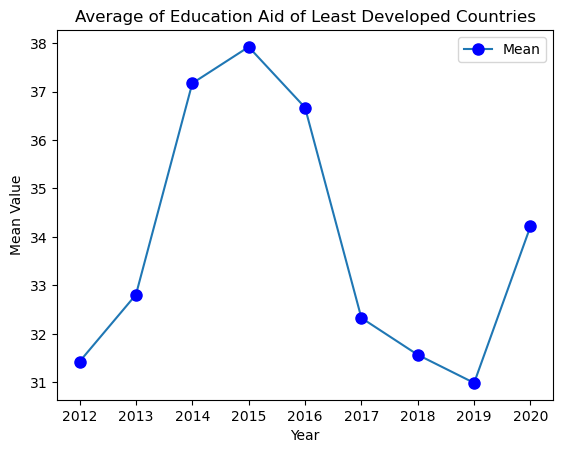

In [73]:
df_PS2.plot(x='Year', y='Mean', kind='line',marker = 'o', ms = 8, mec = 'b', mfc='blue')

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Average of Education Aid of Least Developed Countries')

# Show the plot
plt.show()

# Problem Statement 3

# P3 - To determine the ranking of countries in increasing order of the    percentage of the population aged 25-34 globally, who have successfully completed tertiary studies for the years 2019 & 2021, and identify any trends or patterns in the data over time.  

# Dataset for Problem Statement - 3

In [3]:
df_PS3 = pd.read_csv('Tert_edu.csv')
df_PS3

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Belgium,36.0,37.5,37.6,38.9,40.7,40.6,41.9,41.3,42.3,...,43.0,42.7,44.2,43.1,44.3,45.7,47.4,47.3,48.5,50.9
1,Bulgaria,18.9,23.0,23.1,23.6,24.3,23.7,24.5,24.9,26.0,...,27.2,29.6,31.3,31.8,32.8,33.4,34.0,32.7,33.0,33.6
2,Czechia,11.7,11.8,12.1,12.1,12.9,14.2,15.2,15.5,17.7,...,27.8,29.2,29.9,31.0,32.6,33.8,33.3,32.6,33.0,34.9
3,Denmark,28.9,31.1,32.3,35.1,37.6,39.8,40.8,36.2,36.2,...,40.2,40.9,41.6,43.0,44.6,45.5,45.8,47.1,47.1,49.7
4,Germany,22.4,22.2,21.0,21.8,22.9,22.5,22.0,22.6,23.9,...,28.9,29.9,28.4,29.6,30.5,31.3,32.3,33.3,35.3,35.7
5,Estonia,28.4,27.0,26.3,27.4,27.7,33.1,34.5,34.4,35.8,...,40.1,40.6,40.6,38.5,39.1,40.9,41.1,40.6,40.1,43.2
6,Ireland,30.6,34.1,35.5,37.7,40.1,40.9,43.5,46.2,47.2,...,50.3,52.1,53.4,54.0,54.3,54.7,56.2,55.4,58.4,61.7
7,Greece,23.3,22.9,23.1,23.1,24.8,24.9,26.3,27.3,27.7,...,34.5,37.2,38.7,40.1,41.0,42.5,42.8,42.4,43.7,44.2
8,Spain,33.9,35.4,37.5,37.9,39.0,40.7,40.3,40.0,40.0,...,40.4,41.1,41.5,41.0,41.0,42.6,44.3,46.5,47.4,48.7
9,France,31.4,33.3,35.2,38.0,38.5,39.9,41.5,41.4,40.6,...,42.6,43.9,44.3,44.8,44.2,44.5,47.0,48.2,49.4,50.3


In [4]:
first_five = df_PS3.loc[:, df_PS3.columns[:6]]
last_five = df_PS3.loc[:, df_PS3.columns[-4:]]
result = pd.concat([first_five, last_five], axis=1)
result.insert(len(first_five.columns), 'dashes', '-')
print(result)

           Country  2000  2001  2002  2003  2004 dashes  2018  2019  2020  \
0          Belgium  36.0  37.5  37.6  38.9  40.7      -  47.4  47.3  48.5   
1         Bulgaria  18.9  23.0  23.1  23.6  24.3      -  34.0  32.7  33.0   
2          Czechia  11.7  11.8  12.1  12.1  12.9      -  33.3  32.6  33.0   
3          Denmark  28.9  31.1  32.3  35.1  37.6      -  45.8  47.1  47.1   
4         Germany   22.4  22.2  21.0  21.8  22.9      -  32.3  33.3  35.3   
5          Estonia  28.4  27.0  26.3  27.4  27.7      -  41.1  40.6  40.1   
6          Ireland  30.6  34.1  35.5  37.7  40.1      -  56.2  55.4  58.4   
7           Greece  23.3  22.9  23.1  23.1  24.8      -  42.8  42.4  43.7   
8            Spain  33.9  35.4  37.5  37.9  39.0      -  44.3  46.5  47.4   
9           France  31.4  33.3  35.2  38.0  38.5      -  47.0  48.2  49.4   
10         Croatia   0.0   0.0  16.9  17.7  17.4      -  35.4  35.5  36.6   
11           Italy  10.6  11.3  12.2  13.0  14.7      -  27.7  27.7  28.9   

# Countries ranked in increasing order using Rank Function

In [12]:
df_PS3['Rank'] = df_PS3['2019'].rank()
df_PS3.sort_values('Rank', inplace = True)
data1 = df_PS3[["Country","2019","Rank"]]
data1

,Country,2019,Rank
21,Romania,25.5,1.0
11,Italy,27.7,2.0
16,Hungary,30.6,3.0
2,Czechia,32.6,4.0
1,Bulgaria,32.7,5.0
4,Germany,33.3,6.0
10,Croatia,35.5,7.0
20,Portugal,37.4,8.0
23,Slovakia,39.2,9.0
5,Estonia,40.6,10.0


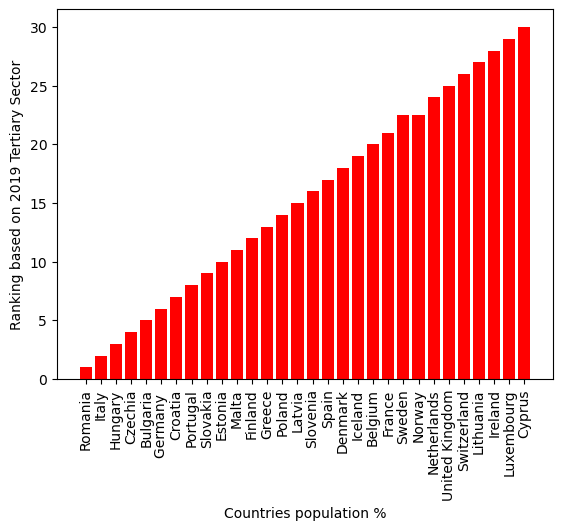

In [13]:
plt.bar(data1["Country"], data1["Rank"],color='red')
plt.xlabel("Countries population %")
plt.ylabel("Ranking based on 2019 Tertiary Sector")
plt.xticks(rotation=90)
plt.show()

In [10]:
df_PS3['Rank'] = df_PS3['2021'].rank()
df_PS3.sort_values('Rank', inplace = True)
data2 = df_PS3[["Country","2021","Rank"]]
data2

,Country,2021,Rank
29,United Kingdom,0.0,1.0
21,Romania,23.3,2.0
11,Italy,28.3,3.0
16,Hungary,32.9,4.0
1,Bulgaria,33.6,5.0
2,Czechia,34.9,6.0
4,Germany,35.7,7.5
10,Croatia,35.7,7.5
23,Slovakia,39.5,9.0
24,Finland,40.1,10.0


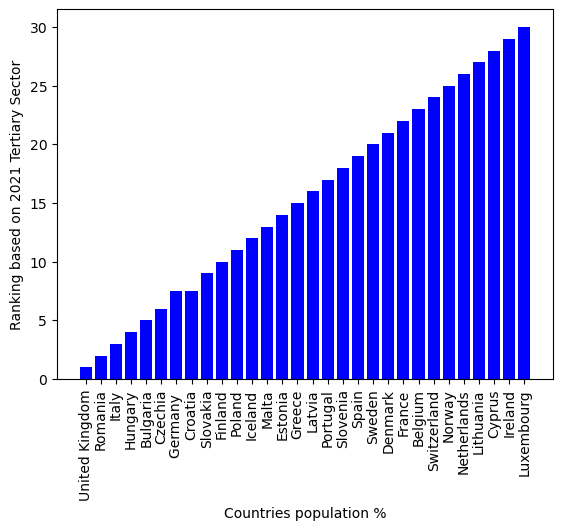

In [11]:
plt.bar(data2["Country"], data2["Rank"],color='blue')
plt.xlabel("Countries population %")
plt.ylabel("Ranking based on 2021 Tertiary Sector")
plt.xticks(rotation=90)
plt.show()